<a href="https://colab.research.google.com/github/laurenneal/capstone-visual-neuroscience/blob/Dylan/scikit_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#pull in the single framed features
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/210815_0_1_label_mc_mix1_syt_features_1Frame_demo.csv')
df = df.drop(columns = ['Unnamed: 0']).drop_duplicates().sample(20000)
df.head()

,roi_ID,area,center_of_mass_row,center_of_mass_column,fluorescence,stimulus_demo,label
39177,210815_0_1_stackRaw_mc_mix1_syt_7,8.737703,51.133742,170.428963,145.181905,0.007748,t5
32804,210815_0_1_stackRaw_mc_mix1_syt_5,12.142288,74.400948,104.888285,3283.901946,0.090583,tm9
10830,210815_0_1_stackRaw_mc_mix1_syt_1,9.489691,40.312613,82.219801,0.000000,-0.816997,tm2
33702,210815_0_1_stackRaw_mc_mix1_syt_6,7.805018,81.613108,115.277042,528.068507,0.009769,tm1
36851,210815_0_1_stackRaw_mc_mix1_syt_6,7.805018,81.613108,115.277042,0.000000,0.186499,tm1


In [18]:
X_df = df.drop(columns = ['roi_ID', 'label'])
y = df['label']

Nearest Neighbors: score: 0.999875


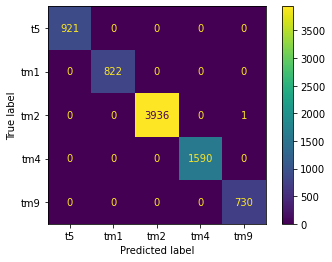

Linear SVM: score: 0.903625


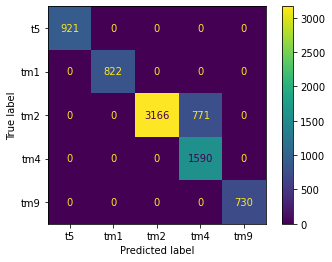

KeyboardInterrupt: ignored

In [19]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


# preprocess dataset, split into training and test part
X = StandardScaler().fit_transform(X_df)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=101
)


# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f'{name}: score: {score}')

    preds = clf.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, preds)
    plt.show()


In [10]:
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model.fit(X_train, y_train)
model

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

In [22]:
X

array([[-0.32901287,  0.1016564 ,  2.45228648, -0.54396902,  0.04361475],
       [ 2.19352869,  1.38523646,  0.19649376,  1.83157384,  0.27283043],
       [ 0.22815387, -0.49531191, -0.58371486, -0.65385007, -2.23854901],
       ...,
       [-1.02006255,  1.78310908,  0.55405616, -0.65385007,  1.00837155],
       [-0.32901287,  0.1016564 ,  2.45228648, -0.47490605,  0.71670061],
       [ 0.16410543, -1.27841078, -0.62878719, -0.15558571,  0.2151594 ]])

Elapsed time to compute the importances: 1.433 seconds


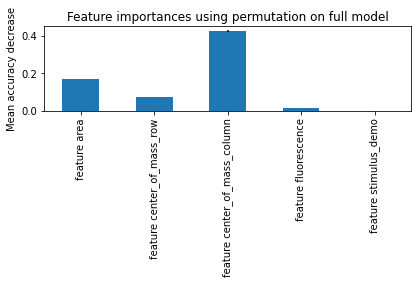

In [24]:
from sklearn.inspection import permutation_importance
import time
feature_names = [f"feature {i}" for i in X_df.columns]
start_time = time.time()
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()